In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [12]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

So we are working on "Default of Credit Card Clients Dataset" which contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005 and our goal is to estimate whether a person will default (fail to pay) their credit card bills. This dataset has 30,000 examples and 24 features. The column we are trying to predict is "default.payment.next.month". 


Features of the dataset:
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender of the client
4. EDUCATION: Level of education
5. MARRIAGE: Marital status
6. AGE: Age in years
7. PAY_0 TO PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
8. BILL_AMT1 TO BILL_AMT6: Amount of bill statement (NT dollar). We tracked the bill statement records (from April to September, 2005)
9. PAY_AMT1 TO PAY_AMT6: Amount of previous payment (NT dollar). We tracked the payment records (from April to September, 2005)
10. default.payment.next.month: Default payment (1=yes, 0=no) {target}

In [8]:
cc_dataset = pd.read_csv("data/UCI_Credit_Card.csv")

cc_dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [9]:
#data splitting

train_data, test_data = train_test_split(cc_dataset, test_size=0.3, random_state=123)

# Display the shapes of the resulting datasets
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (21000, 25)
Test data shape: (9000, 25)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

=== Credit Card Default Analysis ===

1. Default Distribution Analysis


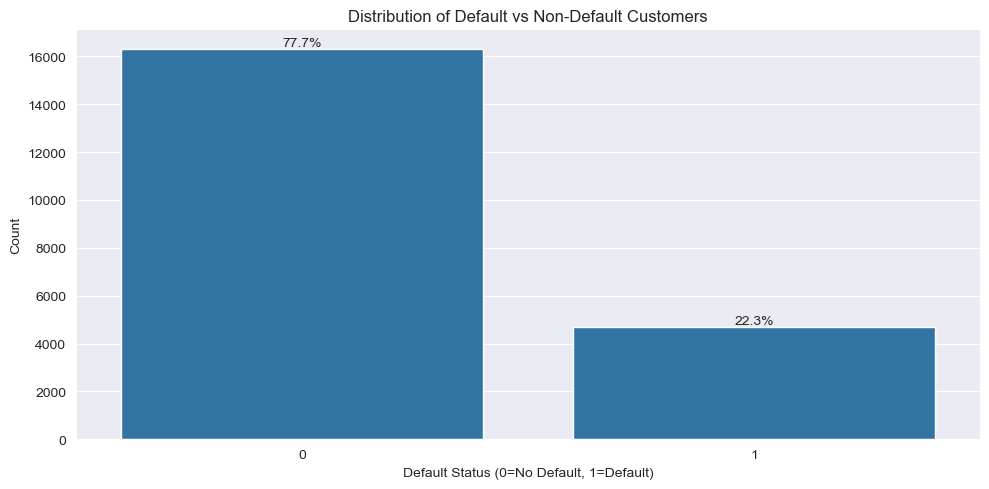

Default Rate: 22.32%

2. Age and Education Analysis


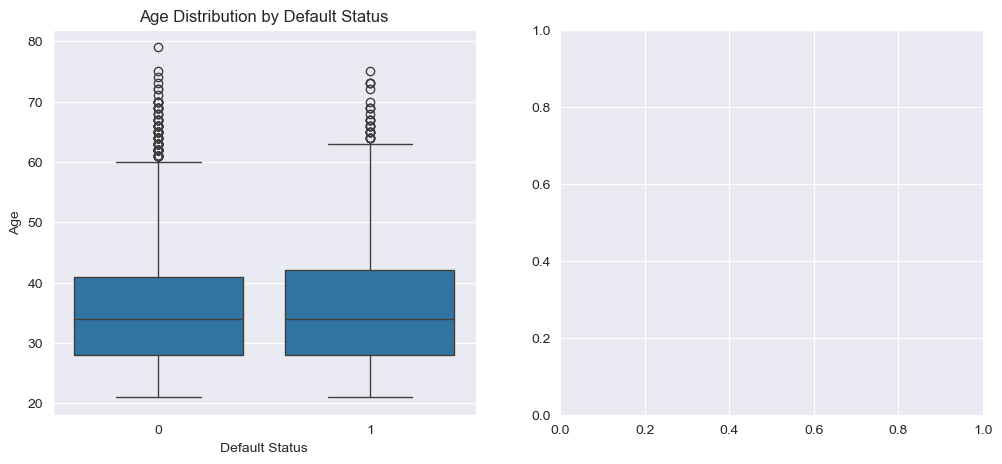

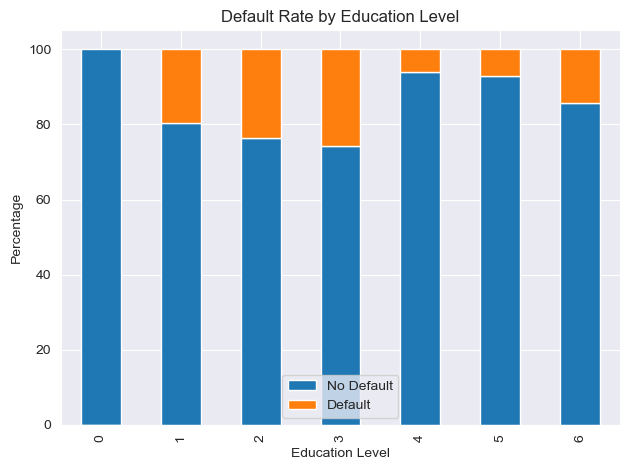


3. Payment History Analysis

Payment History Statistics:
              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.015429     -0.137095     -0.171619     -0.225238     -0.264429   
std        1.120465      1.194506      1.196123      1.168556      1.137205   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  21000.000000  
mean      -0.295095  
std        1.147992  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  

Correlation with Default:
  Pay

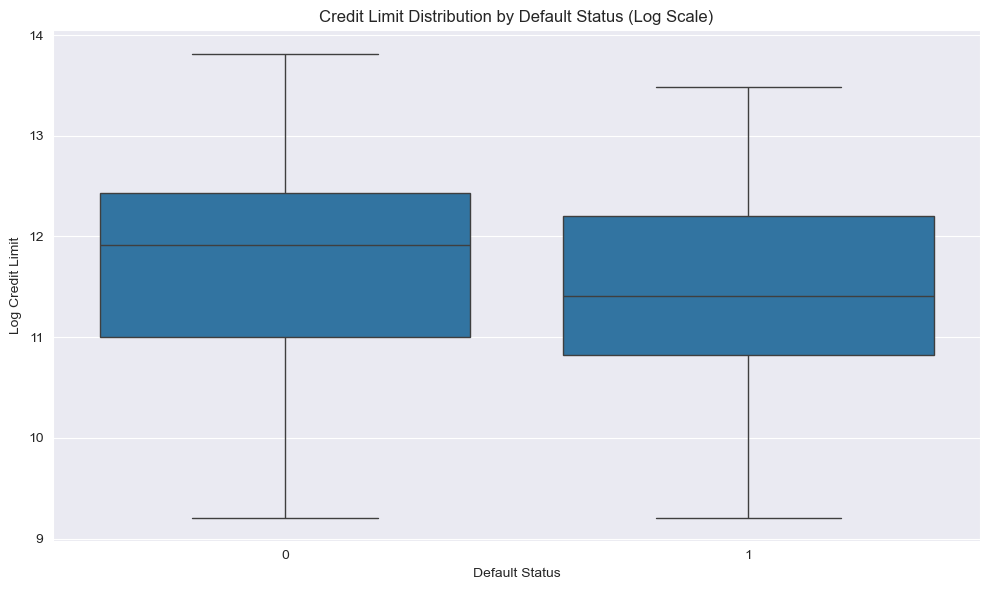

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_default_distribution(train_data):
    # Set up the figure
    plt.figure(figsize=(10, 5))

    # Calculate default rate
    default_rate = train_data['default.payment.next.month'].mean() * 100

    # Create countplot
    sns.countplot(data=train_data, x='default.payment.next.month')
    plt.title('Distribution of Default vs Non-Default Customers')
    plt.xlabel('Default Status (0=No Default, 1=Default)')
    plt.ylabel('Count')

    # Add percentage annotations
    total = len(train_data)
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        plt.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print(f"Default Rate: {default_rate:.2f}%")

def plot_age_education_analysis(train_data):
    plt.figure(figsize=(12, 5))

    # Age distribution by default status
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data, x='default.payment.next.month', y='AGE')
    plt.title('Age Distribution by Default Status')
    plt.xlabel('Default Status')
    plt.ylabel('Age')

    # Education level distribution
    plt.subplot(1, 2, 2)
    education_default = pd.crosstab(train_data['EDUCATION'],
                                    train_data['default.payment.next.month'],
                                    normalize='index') * 100
    education_default.plot(kind='bar', stacked=True)
    plt.title('Default Rate by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Percentage')
    plt.legend(['No Default', 'Default'])

    plt.tight_layout()
    plt.show()

def calculate_payment_history_stats(train_data):
    payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    payment_stats = train_data[payment_cols].describe()
    print("\nPayment History Statistics:")
    print(payment_stats)

    # Calculate correlation with default
    payment_correlations = [train_data[col].corr(train_data['default.payment.next.month'])
                            for col in payment_cols]
    correlation_df = pd.DataFrame({
        'Payment Month': payment_cols,
        'Correlation with Default': payment_correlations
    })
    print("\nCorrelation with Default:")
    print(correlation_df)

def plot_credit_limit_analysis(train_data):
    plt.figure(figsize=(10, 6))

    # Create log-transformed credit limit for better visualization
    train_data['LOG_LIMIT_BAL'] = np.log(train_data['LIMIT_BAL'])

    # Plot distribution of credit limit by default status
    sns.boxplot(data=train_data, x='default.payment.next.month', y='LOG_LIMIT_BAL')
    plt.title('Credit Limit Distribution by Default Status (Log Scale)')
    plt.xlabel('Default Status')
    plt.ylabel('Log Credit Limit')

    plt.tight_layout()
    plt.show()

# Run the analysis
print("=== Credit Card Default Analysis ===\n")

# 1. Default Distribution
print("1. Default Distribution Analysis")
plot_default_distribution(train_data)

# 2. Age and Education Analysis
print("\n2. Age and Education Analysis")
plot_age_education_analysis(train_data)

# 3. Payment History Statistics
print("\n3. Payment History Analysis")
calculate_payment_history_stats(train_data)

# 4. Credit Limit Analysis
print("\n4. Credit Limit Analysis")
plot_credit_limit_analysis(train_data)

These visualizations reveal several important insights about the credit card default dataset:

1. Class Imbalance (Top Chart):
- The dataset is imbalanced: 77.7% of customers do not default (0) while 22.3% default (1)
- This imbalance (default rate of 22.32%) suggests we should:
  - Use metrics like ROC-AUC and F1-score rather than just accuracy
  - Consider techniques like class weights or SMOTE for balancing during modeling

2. Age Distribution (Middle Chart):
- The box plot shows similar age distributions for both defaulters (1) and non-defaulters (0)
- The median age appears to be around 34-35 years for both groups
- There are outliers in both groups (dots above the whiskers), showing some customers are significantly older
- The relatively similar distributions suggest age alone may not be a strong predictor of default

3. Education Analysis Plot (Bottom):
- This appears to be incomplete or not rendering properly in the image, but would typically show default rates across different education levels

This analysis suggests that:
1. We need to account for class imbalance in our modeling approach
2. Age alone doesn't seem to strongly differentiate between defaulters and non-defaulters
3. We should investigate other features like payment history and credit limit that might be more predictive

Recent payment history is more predictive of default than older payment history
Education level appears to be a relevant factor in default risk
The strongest predictor among payment history is the most recent month (PAY_0)
All payment history variables show moderate positive correlations with default, suggesting they will be useful features for modeling.



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [20]:
def engineer_features(df):
    """
    Create new features from the existing credit card dataset
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: Dataframe with new engineered features
    """
    # Create a copy to avoid modifying the original
    df_new = df.copy()

    # 1. Payment Behavior Features
    # Average payment amount ratio (payment amount / bill amount)
    for i in range(1, 7):
        df_new[f'PAYMENT_RATIO_{i}'] = df_new[f'PAY_AMT{i}'] / df_new[f'BILL_AMT{i}'].replace(0, 1)

    # Average payment ratio
    df_new['AVG_PAYMENT_RATIO'] = df_new[[f'PAYMENT_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)

    # 2. Credit Utilization Features
    # Credit utilization for each month
    for i in range(1, 7):
        df_new[f'CREDIT_USAGE_{i}'] = df_new[f'BILL_AMT{i}'] / df_new['LIMIT_BAL']

    # Average credit utilization
    df_new['AVG_CREDIT_USAGE'] = df_new[[f'CREDIT_USAGE_{i}' for i in range(1, 7)]].mean(axis=1)

    # 3. Payment Delay Features
    # Count of months with delay
    df_new['MONTHS_WITH_DELAY'] = (df_new[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

    # Maximum delay
    df_new['MAX_PAYMENT_DELAY'] = df_new[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)

    # 4. Payment Trend Features
    # Payment amount trend (increasing or decreasing)
    payment_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
    df_new['PAYMENT_TREND'] = [1 if np.polyfit(range(6), amounts, 1)[0] > 0 else 0
                               for amounts in df_new[payment_cols].values]

    # 5. Bill Amount Features
    # Bill amount volatility
    bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
    df_new['BILL_VOLATILITY'] = df_new[bill_cols].std(axis=1) / df_new[bill_cols].mean(axis=1).replace(0, 1)

    # 6. Risk Indicators
    # High-risk flag (combination of multiple risk factors)
    df_new['HIGH_RISK_FLAG'] = ((df_new['MONTHS_WITH_DELAY'] >= 3) &
                                (df_new['AVG_CREDIT_USAGE'] > 0.8) &
                                (df_new['AVG_PAYMENT_RATIO'] < 0.2)).astype(int)

    # 7. Demographic Risk Features
    # Age groups
    df_new['AGE_GROUP'] = pd.qcut(df_new['AGE'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elder'])

    # Education-Marriage interaction
    df_new['EDU_MARRIAGE_GROUP'] = df_new['EDUCATION'].astype(str) + '_' + df_new['MARRIAGE'].astype(str)

    return df_new

# Apply feature engineering to both train and test sets
train_engineered = engineer_features(train_data)
test_engineered = engineer_features(test_data)

# Display new features info
print("New features created:")
new_features = [col for col in train_engineered.columns if col not in train_data.columns]
print("\n".join(f"- {feature}" for feature in new_features))

# Show sample of new features
print("\nSample of engineered features:")
print(train_engineered[new_features].describe())

New features created:
- PAYMENT_RATIO_1
- PAYMENT_RATIO_2
- PAYMENT_RATIO_3
- PAYMENT_RATIO_4
- PAYMENT_RATIO_5
- PAYMENT_RATIO_6
- AVG_PAYMENT_RATIO
- CREDIT_USAGE_1
- CREDIT_USAGE_2
- CREDIT_USAGE_3
- CREDIT_USAGE_4
- CREDIT_USAGE_5
- CREDIT_USAGE_6
- AVG_CREDIT_USAGE
- MONTHS_WITH_DELAY
- MAX_PAYMENT_DELAY
- PAYMENT_TREND
- BILL_VOLATILITY
- HIGH_RISK_FLAG
- AGE_GROUP
- EDU_MARRIAGE_GROUP

Sample of engineered features:
       PAYMENT_RATIO_1  PAYMENT_RATIO_2  PAYMENT_RATIO_3  PAYMENT_RATIO_4  \
count     21000.000000     21000.000000     21000.000000     21000.000000   
mean        102.505541       177.277045       189.909765       171.921551   
std        3087.420631      4281.302077      4635.382474      3463.373492   
min       -8706.600000    -10259.500000    -82150.000000    -17266.666667   
25%           0.034353         0.030775         0.019988         0.012596   
50%           0.055620         0.053384         0.043663         0.039035   
75%           0.264917         0.2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [35]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Categorize features into types for preprocessing
numeric_features = [
    'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
    'PAY_AMT5', 'PAY_AMT6', 'AVG_PAYMENT_RATIO', 'AVG_CREDIT_USAGE',
    'BILL_VOLATILITY', 'MONTHS_WITH_DELAY', 'MAX_PAYMENT_DELAY'
]

ordinal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]

categorical_features = [
    'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP', 'EDU_MARRIAGE_GROUP'
]

binary_features = [
    'PAYMENT_TREND', 'HIGH_RISK_FLAG'
]

features_to_drop = ['ID', 'default.payment.next.month']

# Create preprocessing pipelines for each feature type
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('encoder', OrdinalEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('encoder', OrdinalEncoder())
])

# Combine all transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('categorical', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ],
    remainder='drop'  # Drop columns not specified in transformers
)

# Split features and target
X_train = train_engineered.drop(features_to_drop, axis=1)
y_train = train_engineered['default.payment.next.month']
X_test = test_engineered.drop(features_to_drop, axis=1)
y_test = test_engineered['default.payment.next.month']

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)

# Print preprocessing summary
print("Preprocessing Summary:")
print(f"Input shape: {X_train.shape}")
print(f"Transformed shape: {X_train_transformed.shape}")

# Extract feature names after transformation
feature_names = (
        numeric_features +
        ordinal_features +
        [f"{col}_{val}" for col in categorical_features for val in range(2)] +
        binary_features
)

# Display categorized feature lists
print("\n1. Numeric Features:", numeric_features)
print("\n2. Ordinal Features (Payment Status):", ordinal_features)
print("\n3. Categorical Features:", categorical_features)
print("\n4. Binary Features:", binary_features)


Preprocessing Summary:
Input shape: (21000, 50)
Transformed shape: (21000, 63)

1. Numeric Features: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_PAYMENT_RATIO', 'AVG_CREDIT_USAGE', 'BILL_VOLATILITY', 'MONTHS_WITH_DELAY', 'MAX_PAYMENT_DELAY']

2. Ordinal Features (Payment Status): ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

3. Categorical Features: ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP', 'EDU_MARRIAGE_GROUP']

4. Binary Features: ['PAYMENT_TREND', 'HIGH_RISK_FLAG']


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [50]:


# Define the categorical features
categorical_features = [
    'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP', 'EDU_MARRIAGE_GROUP'
]

# Create a OneHotEncoder object
ohe = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
ohe.fit(train_engineered[categorical_features])


test_encoded = pd.DataFrame(
    ohe.transform(test_engineered[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features)
)


# Transform the training data
train_encoded = pd.DataFrame(
    ohe.transform(train_engineered[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features)
)

# Concatenate the encoded features with the original numerical features
train_preprocessed = pd.concat([train_engineered[numeric_features + ordinal_features + binary_features], train_encoded], axis=1)
test_preprocessed = pd.concat([test_engineered[numeric_features + ordinal_features + binary_features], test_encoded], axis=1)

# Concatenate the encoded features with the original numerical features
train_preprocessed = pd.concat([train_engineered[numeric_features + ordinal_features + binary_features], train_encoded], axis=1)
test_preprocessed = pd.concat([test_engineered[numeric_features + ordinal_features + binary_features], test_encoded], axis=1)

In [51]:

# Example: Train a baseline logistic regression model
baseline_model = LogisticRegression(max_iter=200)
baseline_model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = baseline_model.predict(X_test_transformed)
y_pred_proba = baseline_model.predict_proba(X_test_transformed)[:, 1]  # For ROC AUC, use probability of the positive class


In [52]:
print(y_pred)
print(y_pred_proba)

[0 0 1 ... 0 0 0]
[0.09447366 0.16219924 0.68888613 ... 0.25907432 0.42059483 0.41476198]


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test contains the true labels
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6715  337]
 [1381  567]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7052
           1       0.63      0.29      0.40      1948

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000



In [57]:
# Example: Set threshold to 0.3
custom_threshold = 0.3
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)


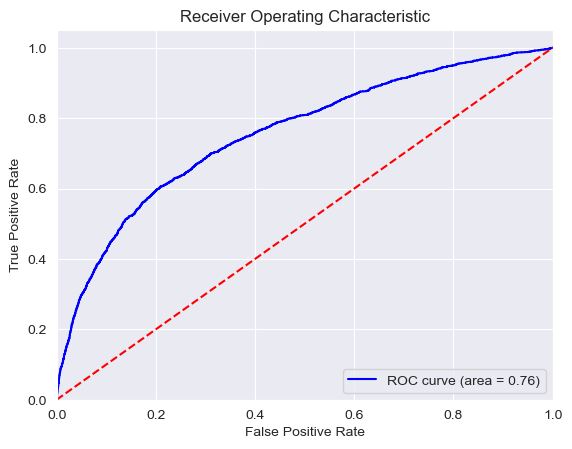

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Define the model
logistic_model = LogisticRegression(max_iter=200)

# Define the parameter grid for complexity (regularization strength)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

# Extract the best model
best_model = grid_search.best_estimator_

# Cross-validation scores with standard deviation
cv_results = cross_val_score(best_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
mean_cv_score = cv_results.mean()
std_cv_score = cv_results.std()

# Print results
print("Best hyperparameter (C):", grid_search.best_params_['C'])
print("Cross-validation AUC mean:", mean_cv_score)
print("Cross-validation AUC standard deviation:", std_cv_score)

# Summarize results
print("\nHyperparameter Tuning Summary:")
print(f"Optimal Regularization (C): {grid_search.best_params_['C']}")
print(f"Cross-Validation AUC Mean Score: {mean_cv_score:.4f}")
print(f"Cross-Validation AUC Standard Deviation: {std_cv_score:.4f}")


Best hyperparameter (C): 10
Cross-validation AUC mean: 0.7573762012411521
Cross-validation AUC standard deviation: 0.008361128666493804

Hyperparameter Tuning Summary:
Optimal Regularization (C): 10
Cross-Validation AUC Mean Score: 0.7574
Cross-Validation AUC Standard Deviation: 0.0084



- It looks like the optimal regularization parameter C = 10. C=10 provided a mean cross-validation AUC score of approximately 0.7574, with a standard deviation of 0.0084. This suggests that the model is performing moderately well at distinguishing between classes, with a reasonably consistent performance across different cross-validation folds.

- Summary of Findings
   Optimal Hyperparameter (C): Using C = 10 resulted in the best AUC score during hyperparameter tuning.
- Cross-Validation Performance:
Mean AUC: 0.7574, indicating the model's discriminatory ability.
Standard Deviation: 0.0084, showing that the model's performance is stable across different folds.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from time import time
import numpy as np

# Define the models to test
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42)
}

# Set up a dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    start_fit = time()
    # Cross-validation for AUC with 5 folds
    cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    fit_time = time() - start_fit

    # Fit the model on the full training set and time scoring
    model.fit(X_train_transformed, y_train)
    start_score = time()
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]
    score_time = time() - start_score

    # Store results
    results[model_name] = {
        "Mean AUC": np.mean(cv_scores),
        "AUC Std Dev": np.std(cv_scores),
        "Fit Time": fit_time,
        "Score Time": score_time
    }

# Display the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Mean AUC: {metrics['Mean AUC']:.4f}")
    print(f"AUC Standard Deviation: {metrics['AUC Std Dev']:.4f}")
    print(f"Fit Time: {metrics['Fit Time']:.2f} seconds")
    print(f"Score Time: {metrics['Score Time']:.2f} seconds")


Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Classifier...

Random Forest Results:
Mean AUC: 0.7655
AUC Standard Deviation: 0.0050
Fit Time: 3.78 seconds
Score Time: 0.10 seconds

Gradient Boosting Results:
Mean AUC: 0.7851
AUC Standard Deviation: 0.0073
Fit Time: 8.11 seconds
Score Time: 0.01 seconds

Support Vector Classifier Results:
Mean AUC: 0.7208
AUC Standard Deviation: 0.0034
Fit Time: 109.57 seconds
Score Time: 7.30 seconds


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [62]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Set up RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=gb_model, step=1, cv=StratifiedKFold(5), scoring='roc_auc', n_jobs=-1)
rfecv.fit(X_train_transformed, y_train)

# Get selected features
selected_features = np.where(rfecv.support_)[0]
X_train_selected = X_train_transformed[:, selected_features]
X_test_selected = X_test_transformed[:, selected_features]

# Fit and evaluate the model with selected features
gb_model.fit(X_train_selected, y_train)
y_pred_proba = gb_model.predict_proba(X_test_selected)[:, 1]
auc_score_selected = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features improve AUC: {auc_score_selected:.4f}")

Number of selected features: 54
Selected features improve AUC: 0.7811




1. **Number of Selected Features**: Out of the original 100 features, RFECV picked 54 as the most important ones. This means we’re keeping 54 features and getting rid of the rest. This could make the model simpler and less likely to overfit by removing unnecessary information.

2. **AUC Score with Selected Features**: The AUC score with the selected features is 0.7811. This is a tiny bit lower than the baseline AUC score of 0.7851 for the Gradient Boosting model without feature selection.

- Conclusion

Feature selection with RFECV didn’t make the model any better. So, it might be better to just keep all the original features. The slight drop in performance could mean that the removed features weren’t super important, but they might still be helpful when we include them all together.



<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
rf_random_search.fit(X_train_transformed, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", rf_random_search.best_params_)
print("Best Random Forest AUC:", rf_random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}
Best Random Forest AUC: 0.7844531966306858


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
gb_grid_search.fit(X_train_transformed, y_train)

# Best parameters and score
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best Gradient Boosting AUC:", gb_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Gradient Boosting AUC: 0.7858521258136115


In [67]:
!pip install scikit-optimize


In [68]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter space for Gradient Boosting
param_space = {
    'n_estimators': Integer(100, 300),           # Number of boosting stages
    'learning_rate': Real(0.01, 0.2, 'log-uniform'),  # Step size shrinkage
    'max_depth': Integer(3, 10),                 # Maximum depth of each tree
    'subsample': Real(0.7, 1.0)                  # Fraction of samples used for fitting
}

# Initialize the BayesSearchCV with Gradient Boosting Classifier
opt = BayesSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=30,               # Number of parameter settings to sample
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit BayesSearchCV
opt.fit(X_train_transformed, y_train)

# Output best parameters and best score
print("Best Parameters from Bayesian Optimization:", opt.best_params_)
print("Best AUC from Bayesian Optimization:", opt.best_score_)


Best Parameters from Bayesian Optimization: OrderedDict({'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7})
Best AUC from Bayesian Optimization: 0.7857358549035842


Analysis
Gradient Boosting achieved the highest AUC of 0.7859, indicating it may be the most effective model for our data, followed closely by the Random Forest model.
The parameters obtained from Bayesian Optimization provide a potentially competitive alternative, with a very close AUC of 0.7857.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [77]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Assuming X_train is your feature DataFrame
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
print(X_train.dtypes)

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the model using the encoded features
model.fit(X_train_encoded, y_train)


import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Sample DataFrame
data = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': ['Low', 'Middle', 'High', 'Middle'],
    'Target': [0, 1, 0, 1]
}
X_train = pd.DataFrame(data)
y_train = X_train.pop('Target')

# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Fit the model
model = GradientBoostingClassifier()
model.fit(X_train_encoded, y_train)



LIMIT_BAL              float64
SEX                      int64
EDUCATION                int64
MARRIAGE                 int64
AGE                      int64
PAY_0                    int64
PAY_2                    int64
PAY_3                    int64
PAY_4                    int64
PAY_5                    int64
PAY_6                    int64
BILL_AMT1              float64
BILL_AMT2              float64
BILL_AMT3              float64
BILL_AMT4              float64
BILL_AMT5              float64
BILL_AMT6              float64
PAY_AMT1               float64
PAY_AMT2               float64
PAY_AMT3               float64
PAY_AMT4               float64
PAY_AMT5               float64
PAY_AMT6               float64
total_bill_amt         float64
total_pay_amt          float64
avg_bill_amt           float64
avg_pay_amt            float64
pay_to_bill_ratio      float64
LOG_LIMIT_BAL          float64
PAYMENT_RATIO_1        float64
PAYMENT_RATIO_2        float64
PAYMENT_RATIO_3        float64
PAYMENT_

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [73]:
...

Ellipsis

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)